In [1]:
# Common imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import pandas as pd
from sklearn.preprocessing import StandardScaler
from BLS_Regression import bls_regression_train, bls_regression_test

## Import Dataset (Boston house price)

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


## Data Pre-processing

In [3]:
from sklearn.model_selection import train_test_split
# Getting X, y from dataset
X = boston.data
y = boston.target

# Divide dataset into training set and testing set with the ratio of 80% and 20% 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Standardlize the X
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

# Reshape y
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

## Training with bls_regression_train function

In [4]:
fea_num = X_train.shape[1]
NetoutTrain, NumWin, WeightEnhan, WFSparse,WeightTop,meanOfEachWindow,distOfMaxAndMin = bls_regression_train(X_train,y_train,1,fea_num,30,128)

Training has been finished!
The Total Training Time is :  0.060161  seconds


## Testing with bls_regression_test function

In [5]:
test_pred = bls_regression_test(X_test,fea_num,NumWin,WeightEnhan, WFSparse, WeightTop ,meanOfEachWindow,distOfMaxAndMin)

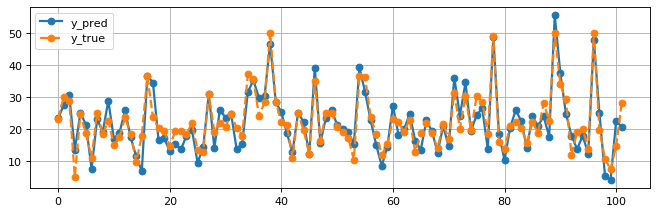

In [6]:
# Plot testing prediction
color_sequence = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c',
                  '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5',
                  '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f',
                  '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#9edae5']


plt.figure(num=None, figsize=(10, 3), dpi=80, facecolor='w', edgecolor='k')
plt.plot(range(len(test_pred)), test_pred, '-o', label='y_pred', color=color_sequence[0], linewidth=2)
plt.plot(range(len(y_test)),  y_test, '--o', label='y_true', color=color_sequence[2], linewidth=2)
plt.grid()
plt.legend()
plt.show()